In [11]:
import torch
import torch.nn as nn
# note
import torch.optim as optim
# note
import torch.utils.data as data
from matplotlib import pyplot as plt

In [12]:
X = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])

In [13]:
class LinearRegressionDataset(data.Dataset):
    def __init__(self, X, y):
        super().__init__()
        self.X = X.reshape(-1, 1)
        self.y = y.reshape(-1, 1)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, ind):
        return self.X[ind], self.y[ind]

In [14]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # (1, 1) -> one input feature and one output feature
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [15]:
dataset = LinearRegressionDataset(X, y)
# batch_size is kept 1 as data is small. So treating it as stochastic gradient descent only
batch_size = dataset.__len__()
dataloader = data.DataLoader(dataset, batch_size=batch_size, shuffle= True)

In [16]:
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr= 0.001)

In [17]:
loss_list = []
for epoch in range(100):
    # setting model to training mode
    model.train()
    running_loss = 0.0
    for input, target in dataloader:
        optimizer.zero_grad()
        output = model(input)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'parameters = w = {model.linear.weight.item()}, b = {model.linear.bias.item()}, loss = {loss.item()}')
    loss_list.append(running_loss)
        

parameters = w = 4.221463203430176, b = 0.41613951325416565, loss = 32271.978515625
parameters = w = 7.2796525955200195, b = 0.6299921274185181, loss = 13863.5732421875
parameters = w = 9.263566017150879, b = 0.7700204849243164, loss = 6115.88134765625
parameters = w = 10.550542831420898, b = 0.8621548414230347, loss = 2855.044677734375
parameters = w = 11.385381698608398, b = 0.9232175350189209, loss = 1482.6240234375
parameters = w = 11.926895141601562, b = 0.96412193775177, loss = 904.99462890625
parameters = w = 12.27811336517334, b = 0.9919481873512268, loss = 661.8756713867188
parameters = w = 12.505878448486328, b = 1.0112895965576172, loss = 559.5447998046875
parameters = w = 12.653552055358887, b = 1.0251259803771973, loss = 516.4678344726562
parameters = w = 12.749267578125, b = 1.0353904962539673, loss = 498.33013916015625
parameters = w = 12.811274528503418, b = 1.043337345123291, loss = 490.6885681152344
parameters = w = 12.851412773132324, b = 1.0497801303863525, loss = 4

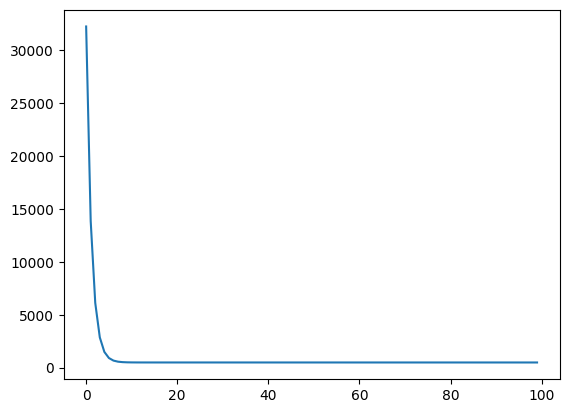

In [18]:
plt.plot(loss_list)
plt.show()